In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


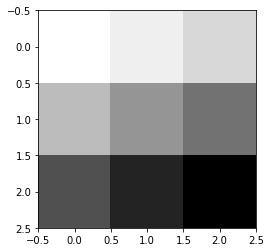

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

('image.shape', (1, 3, 3, 1))
('weight.shape', TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)]))
('conv2d_img.shape', (1, 2, 2, 1))
[[ 12.  16.]
 [ 24.  28.]]


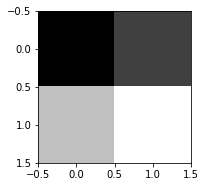

In [4]:
''' 1 filter (2,2,1,1) with padding: VALID '''
# print("imag:\n", image)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID') # stride 1x1
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

('image.shape', (1, 3, 3, 1))
('weight.shape', TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)]))
('conv2d_img.shape', (1, 3, 3, 1))
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


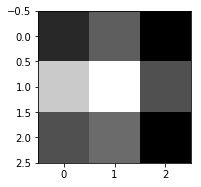

In [5]:
''' 1 filter (2,2,1,1) with padding:SAME '''
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)   # interchange two axes in an array.
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

('image.shape', (1, 3, 3, 1))
('weight.shape', TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(3)]))
('conv2d_img.shape', (1, 3, 3, 3))
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


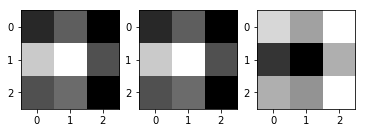

In [8]:
''' 3 filters (2,2,1,3) '''
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [9]:
''' Max Pooling'''
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


In [10]:
'''
SAME: Zero paddings
'''
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


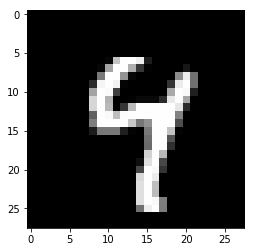

In [16]:
img = mnist.train.images[2].reshape(28,28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)


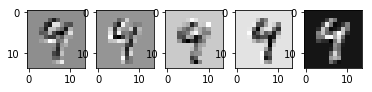

In [18]:
sess = tf.InteractiveSession()
img = img.reshape(-1,28,28,1)
w1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))
conv2d = tf.nn.conv2d(img, w1, strides=[1,2,2,1],padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


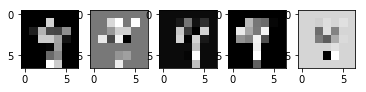

In [19]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')